Instead of calculating the data distribution using a for loop, we can improve it and calculate the distribution at time step t, just by using the data at time step 0. For loops reduce the speed of our code and prevent us from using parallelization techniques. To fix this, we are using this improvisation.

So, we calculate the following variables -

alpha = 1 - beta

alpha_bar = Cumulative product of alpha from t=0 to t=t.

Then, our final data x_t = sqrt(alpha_bar_t) * x_0 + sqrt(1-alpha_bar_t) * x0_like_from_normal_dist

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
import torch

In [23]:
n_samples = 10_000
data, _ = make_swiss_roll(n_samples)
data = data[:, [2, 0]] / 10
data = data * np.array([1, -1]) # Flipping along y axis

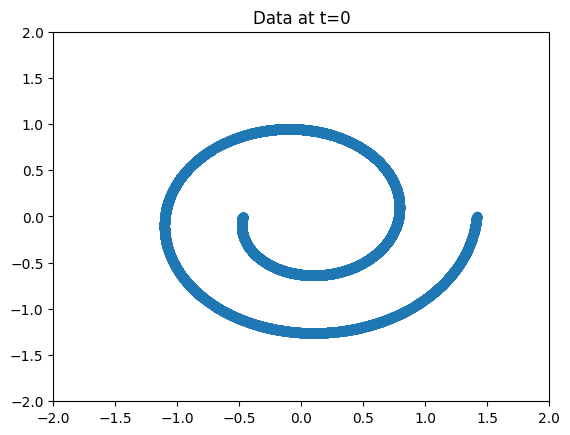

In [30]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Data at t=0')
plt.show()

In [25]:
class DiffusionModel():
    
    def __init__(self, T):
        self.betas = torch.sigmoid(torch.linspace(-18, 10, T)) * (3e-1 - 1e-5) + 1e-5
        self.alphas = 1 - self.betas
        self.alphas_bar = torch.cumprod(self.alphas, dim=0)
        
    def forward_diffusion(self, x0, t):
        t = t-1
        mu = torch.sqrt(self.alphas_bar[t]) * x0
        std = torch.sqrt(1 - self.alphas_bar[t])
        epsilon = torch.randn_like(x0)
        return mu + std * epsilon

In [26]:
model = DiffusionModel(40)
x0 = torch.from_numpy(data)
xT = model.forward_diffusion(x0, 20)

In [27]:
print(xT.mean())
print(xT.std())

tensor(-0.0887, dtype=torch.float64)
tensor(0.6885, dtype=torch.float64)


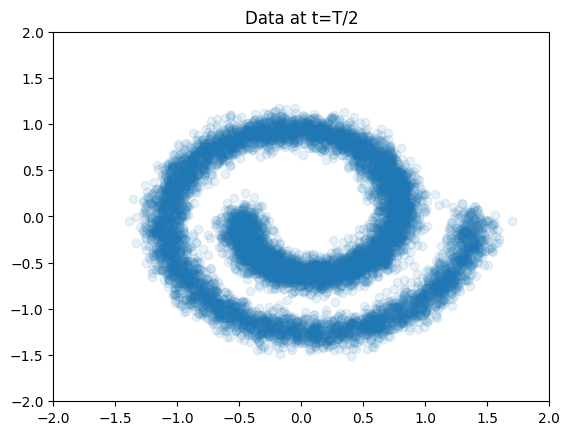

In [28]:
plt.scatter(xT[:, 0], xT[:, 1], alpha = 0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Data at t=T/2')
plt.show()

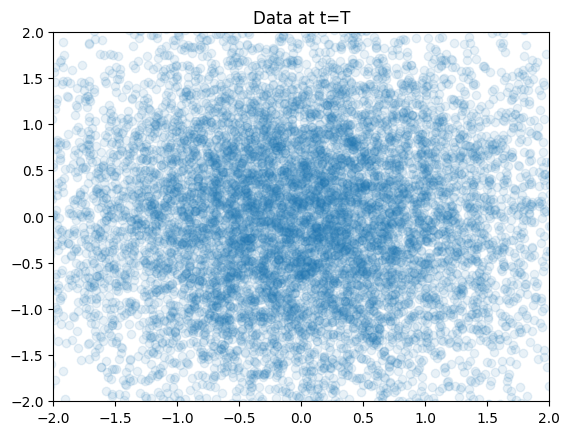

In [29]:
xT = model.forward_diffusion(x0, 40)
plt.scatter(xT[:, 0], xT[:, 1], alpha = 0.1)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Data at t=T')
plt.show()